In [216]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score
import sklearn.datasets
from sklearn.model_selection import train_test_split
from sklearn import ensemble
from sklearn import datasets
from sklearn.datasets import make_regression
from sklearn.linear_model import  Ridge
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score,mean_squared_error
from sklearn.linear_model import SGDRegressor

In [217]:
train_x=pd.read_csv("/content/X_train_v2.csv")
train_y=pd.read_csv("/content/Y_train_sl9m6Jh.csv")
test_x=pd.read_csv("/content/X_test_v2.csv")

In [218]:
train_x

,ID,WF,Time,NWP1_00h_D-2_U,NWP1_00h_D-2_V,NWP1_00h_D-2_T,NWP1_06h_D-2_U,NWP1_06h_D-2_V,NWP1_06h_D-2_T,NWP1_12h_D-2_U,NWP1_12h_D-2_V,NWP1_12h_D-2_T,NWP1_18h_D-2_U,NWP1_18h_D-2_V,NWP1_18h_D-2_T,NWP1_00h_D-1_U,NWP1_00h_D-1_V,NWP1_00h_D-1_T,NWP1_06h_D-1_U,NWP1_06h_D-1_V,NWP1_06h_D-1_T,NWP1_12h_D-1_U,NWP1_12h_D-1_V,NWP1_12h_D-1_T,NWP1_18h_D-1_U,NWP1_18h_D-1_V,NWP1_18h_D-1_T,NWP1_00h_D_U,NWP1_00h_D_V,NWP1_00h_D_T,NWP1_06h_D_U,NWP1_06h_D_V,NWP1_06h_D_T,NWP1_12h_D_U,NWP1_12h_D_V,NWP1_12h_D_T,NWP1_18h_D_U,NWP1_18h_D_V,NWP1_18h_D_T,NWP2_00h_D-2_U,...,NWP3_00h_D-1_T,NWP3_06h_D-1_U,NWP3_06h_D-1_V,NWP3_06h_D-1_T,NWP3_12h_D-1_U,NWP3_12h_D-1_V,NWP3_12h_D-1_T,NWP3_18h_D-1_U,NWP3_18h_D-1_V,NWP3_18h_D-1_T,NWP3_00h_D_U,NWP3_00h_D_V,NWP3_00h_D_T,NWP3_06h_D_U,NWP3_06h_D_V,NWP3_06h_D_T,NWP3_12h_D_U,NWP3_12h_D_V,NWP3_12h_D_T,NWP3_18h_D_U,NWP3_18h_D_V,NWP3_18h_D_T,NWP4_00h_D-2_U,NWP4_00h_D-2_V,NWP4_00h_D-2_CLCT,NWP4_12h_D-2_U,NWP4_12h_D-2_V,NWP4_12h_D-2_CLCT,NWP4_00h_D-1_U,NWP4_00h_D-1_V,NWP4_00h_D-1_CLCT,NWP4_12h_D-1_U,NWP4_12h_D-1_V,NWP4_12h_D-1_CLCT,NWP4_00h_D_U,NWP4_00h_D_V,NWP4_00h_D_CLCT,NWP4_12h_D_U,NWP4_12h_D_V,NWP4_12h_D_CLCT
0,1,WF1,01/05/2018 01:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-2.2485,-3.2578,286.44,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.254603,-0.289687,82.543144,NaN,NaN,NaN
1,2,WF1,01/05/2018 02:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-2.4345,-1.4461,286.26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.490908,-0.413370,99.990844,NaN,NaN,NaN
2,3,WF1,01/05/2018 03:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.3659,-3.0605,285.75,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,287.000000,-5.816164,2.222937,287.000000,-3.796250,-0.853745,287.000000,-1.707402,-1.460474,286.000000,-1.148957,-2.274751,286.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.997093,-1.415138,98.367235,NaN,NaN,NaN
3,4,WF1,01/05/2018 04:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.7065,-6.2174,284.78,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.689598,-0.961441,94.860604,NaN,NaN,NaN
4,5,WF1,01/05/2018 05:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.8134,-5.4446,284.46,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.290994,-0.294963,95.905879,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37370,37371,WF6,15/01/2019 20:00,NaN,NaN,NaN,NaN,NaN,NaN,-1.7901,-5.9711,275.38,-1.6472,-5.6465,274.86,-2.3878,-5.7616,274.00,-1.2294,-5.8994,274.22,-1.2666,-4.9848,273.35,-0.7617,-4.9060,273.75,0.1116,-5.9100,274.34,0.2531,-5.1715,273.87,-0.3281,-5.2839,273.57,0.3614,-5.0075,273.79,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.789877,-0.501813,-0.000013,0.675391,-0.984372,-0.000015,0.560460,-0.938410,-0.000016,0.614775,-0.884509,-0.00002
37371,37372,WF6,15/01/2019 21:00,NaN,NaN,NaN,NaN,NaN,NaN,-1.7966,-5.3346,275.21,-1.5018,-5.4066,274.70,-2.5988,-5.3872,2

In [219]:
train_y

,ID,Production
0,1,0.02
1,2,0.07
2,3,0.22
3,4,0.39
4,5,0.41
...,...,...
37370,37371,0.04
37371,37372,0.33
37372,37373,0.13
37373,37374,0.01


In [220]:
train_y.info()
#y'en a pas de valeurs manquantes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37375 entries, 0 to 37374
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   ID          37375 non-null  int64  
 1   Production  37375 non-null  float64
dtypes: float64(1), int64(1)
memory usage: 584.1 KB


# Data visualization

## Missing data 

In [221]:
#number of missing data for each column in the training set 
print(len(train_x) - train_x.count()),len(train_x)

ID                     0
WF                     0
Time                   0
NWP1_00h_D-2_U     17364
NWP1_00h_D-2_V     17364
                   ...  
NWP4_00h_D_V         144
NWP4_00h_D_CLCT      144
NWP4_12h_D_U       18682
NWP4_12h_D_V       18682
NWP4_12h_D_CLCT    18682
Length: 105, dtype: int64


(None, 37375)

,NWP4_00h_D-2_CLCT,NWP4_00h_D-2_U,NWP4_00h_D-2_V,NWP3_18h_D_U,NWP3_18h_D_V,NWP3_18h_D_T,NWP2_12h_D_U,NWP2_12h_D_V,NWP3_12h_D_T,NWP3_12h_D_U,NWP3_12h_D_V,NWP2_00h_D-2_U,NWP2_00h_D-2_V,NWP3_00h_D-2_T,NWP3_00h_D-2_V,NWP3_00h_D-2_U,NWP3_06h_D_T,NWP3_06h_D_V,NWP3_06h_D_U,NWP1_18h_D_T,NWP1_18h_D_V,NWP1_18h_D_U,NWP3_06h_D-2_U,NWP3_06h_D-2_T,NWP3_06h_D-2_V,NWP2_12h_D-2_V,NWP2_12h_D-2_U,NWP2_12h_D-1_U,NWP2_12h_D-1_V,NWP2_00h_D-1_V,NWP3_18h_D-1_T,NWP3_18h_D-1_V,NWP3_18h_D-1_U,NWP3_18h_D-2_V,NWP2_00h_D-1_U,NWP3_18h_D-2_U,NWP3_18h_D-2_T,NWP3_12h_D-1_T,NWP3_12h_D-1_V,NWP3_12h_D-1_U,NWP3_12h_D-2_U,NWP3_12h_D-2_V,NWP3_12h_D-2_T,NWP3_00h_D_V,NWP3_00h_D-1_U,NWP3_00h_D-1_V,NWP3_00h_D-1_T,NWP3_06h_D-1_U,NWP3_06h_D-1_V,NWP3_06h_D-1_T,NWP3_00h_D_U,NWP2_00h_D_U,NWP3_00h_D_T,NWP2_00h_D_V,NWP1_12h_D_T,NWP1_12h_D_V,NWP1_12h_D_U,NWP4_12h_D_CLCT,NWP4_12h_D_V,NWP4_12h_D_U,NWP1_00h_D-2_U,NWP1_00h_D-2_V,NWP1_00h_D-2_T,NWP4_12h_D-2_V,NWP4_12h_D-2_CLCT,NWP4_12h_D-2_U,NWP1_06h_D_V,NWP1_06h_D_T,NWP1_06h_D_U,NWP1_06h_D-2_V,NWP1_06h_D-2_T,NWP1_06h_D-2_U,NWP1_00h_D-1_V,NWP1_00h_D-1_T,NWP1_18h_D-2_V,NWP1_18h_D-2_U,NWP1_12h_D-2_T,NWP1_12h_D-2_V,NWP1_12h_D-2_U,NWP4_00h_D-1_U,NWP1_00h_D-1_U,NWP1_18h_D-2_T,NWP4_00h_D-1_V,NWP4_00h_D-1_CLCT,NWP4_00h_D_CLCT,NWP1_00h_D_U,NWP1_00h_D_V,NWP1_00h_D_T,NWP4_00h_D_U,NWP4_00h_D_V,NWP1_12h_D-1_T,NWP1_06h_D-1_U,NWP1_06h_D-1_V,NWP1_06h_D-1_T,NWP1_12h_D-1_U,NWP1_12h_D-1_V,NWP1_18h_D-1_U,NWP1_18h_D-1_V,NWP1_18h_D-1_T,NWP4_12h_D-1_CLCT,NWP4_12h_D-1_V,NWP4_12h_D-1_U
Total,35829.000000,35829.000000,35829.000000,34271.000000,34271.000000,34271.000000,31168.000000,31168.000000,31144.000000,31144.000000,31144.000000,29641.000000,29641.000000,29587.000000,29587.000000,29587.000000,28029.000000,28029.000000,28029.000000,28027.000000,28027.000000,28027.000000,26471.000000,26471.000000,26471.000000,25051.000000,25051.000000,25003.000000,25003.000000,24955.000000,24955.000000,24955.000000,24955.000000,24955.000000,24955.000000,24955.000000,24955.000000,24919.000000,24919.000000,24919.000000,24913.000000,24913.000000,24913.000000,24913.000000,24913.000000,24913.000000,24913.000000,24913.000000,24913.000000,24913.000000,24913.000000,24913.000000,24913.000000,24913.000000,18682.000000,18682.000000,18682.000000,18682.000000,18682.000000,18682.000000,17364.000000,17364.000000,17364.000000,17286.000000,17286.000000,17286.000000,9342.000000,9342.000000,9342.000000,8012.000000,8012.000000,8012.000000,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000,144.000000,144.000000,144.000000,144.000000,144.000000,144.000000,138.000000,138.000000,138.000000,138.000000,138.000000,138.000000,138.000000,138.000000,138.000000,138.000000,138.000000,138.000000
Percent,95.863545,95.863545,95.863545,91.694983,91.694983,91.694983,83.392642,83.392642,83.328428,83.328428,83.328428,79.307023,79.307023,79.162542,79.162542,79.162542,74.993980,74.993980,74.993980,74.988629,74.988629,74.988629,70.825418,70.825418,70.825418,67.026087,67.026087,66.897659,66.897659,66.769231,66.769231,66.769231,66.769231,66.769231,66.769231,66.769231,66.769231,66.672910,66.672910,66.672910,66.656856,66.656856,66.656856,66.656856,66.656856,66.656856,66.656856,66.656856,66.656856,66.656856,66.656856,66.656856,66.656856,66.656856,49.985284,49.985284,49.985284,49.985284,49.985284,49.985284,46.458863,46.458863,46.458863,46.250167,46.250167,46.250167,24.995318,24.995318,24.995318,21.436789,21.436789,21.436789,0.754515,0.754515,0.754515,0.754515,0.754515,0.754515,0.754515,0.754515,0.754515,0.754515,0.754515,0.754515,0.385284,0.385284,0.385284,0.385284,0.385284,0.385284,0.369231,0.369231,0.369231,0.369231,0.369231,0.369231,0.369231,0.369231,0.369231,0.369231,0.369231,0.369231


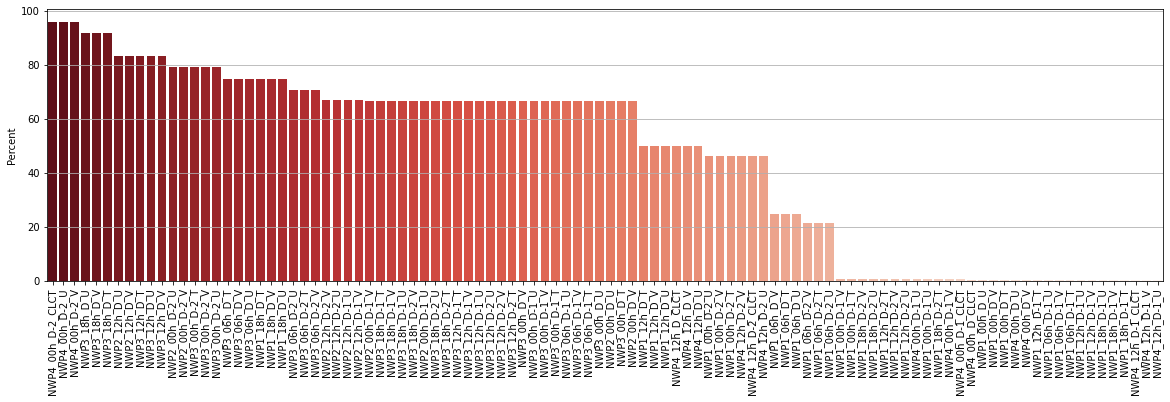

In [222]:
#train_x["NWP1_18h_D-2_U"].isnull().sum()
#missing data 

def missing_percentage(data):
    
    '''A function for showing missing data values'''
    
    total = data.isnull().sum().sort_values(ascending=False)[data.isnull().sum().sort_values(ascending=False) != 0]
    percent = (data.isnull().sum().sort_values(ascending=False) / len(data) *100)[(data.isnull().sum().sort_values(ascending=False) / len(data) * 100) != 0]
    return pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])


missing = missing_percentage(train_x)

fig, ax = plt.subplots(figsize=(20, 5))
sns.barplot(x=missing.index, y='Percent', data=missing, palette='Reds_r')
plt.xticks(rotation=90)
plt.grid(axis="y")
display(missing.T.style.background_gradient(cmap='Reds', axis=1))


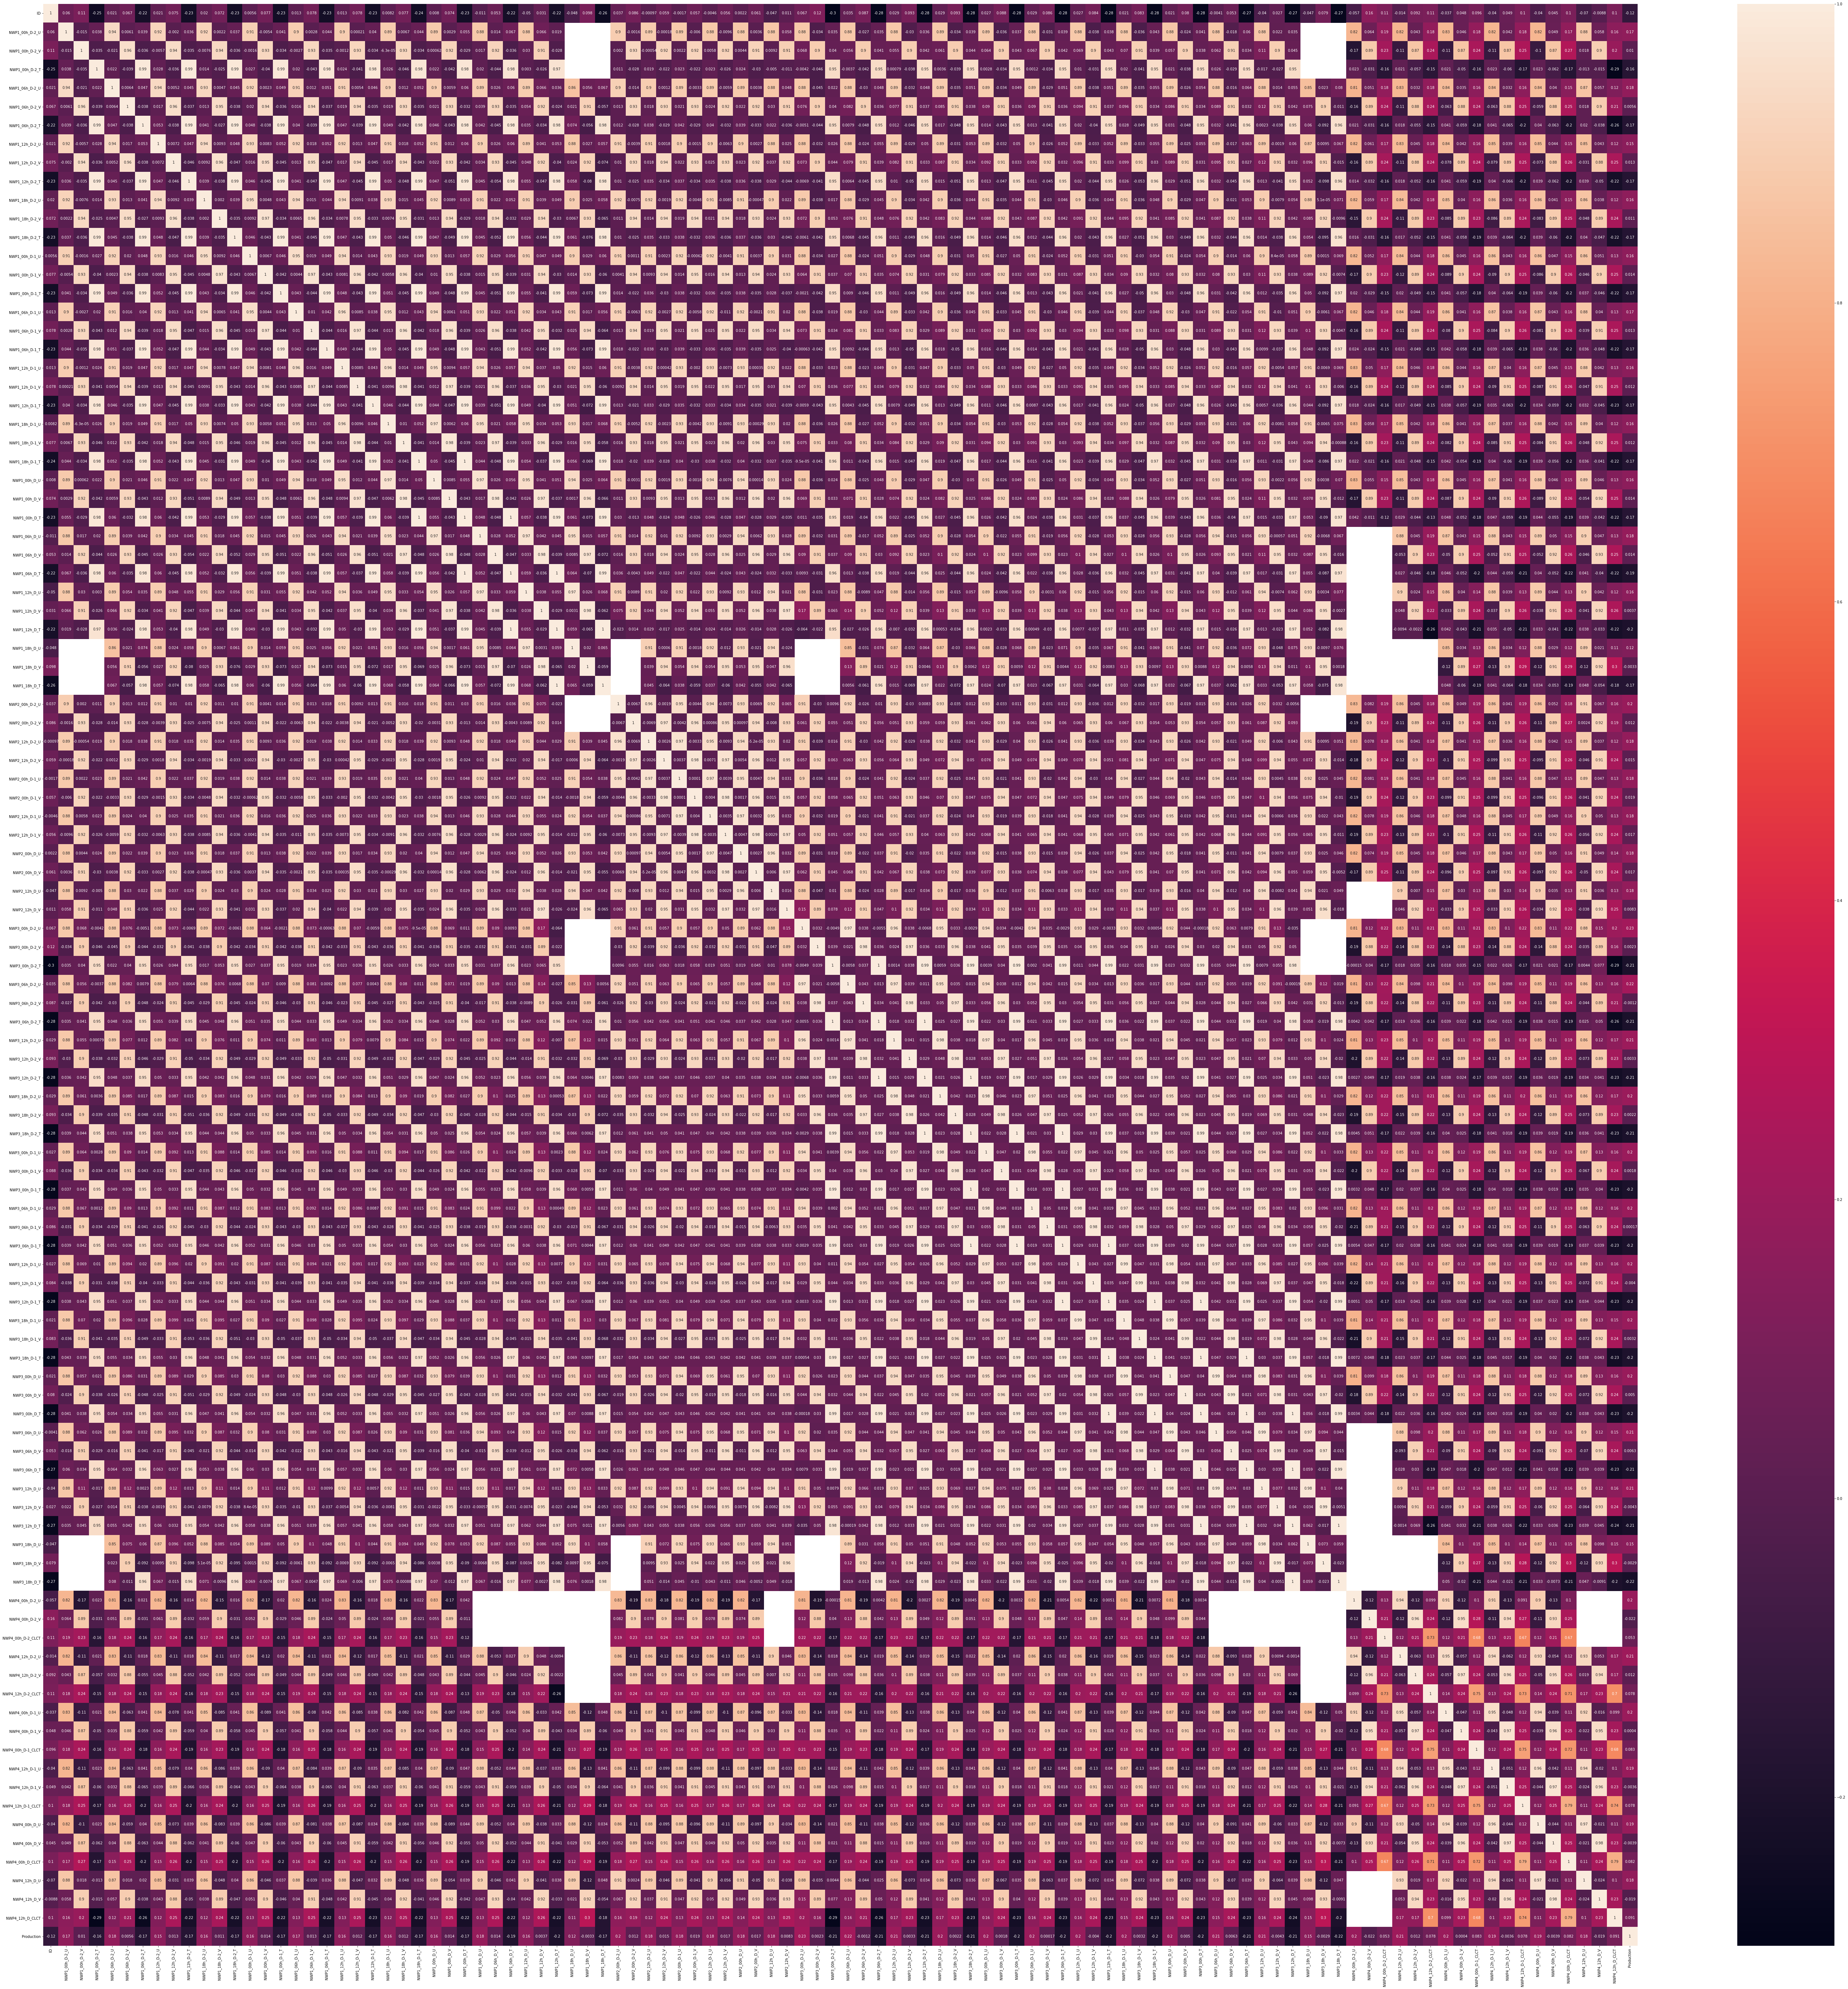

In [223]:
#Pot de la matrice de corrélation 
df=pd.concat([train_x,train_y.Production],axis=1)
corrMatrix = df.corr()
f, ax = plt.subplots(figsize=(100, 100))
sns.heatmap(corrMatrix, annot=True,)
plt.show()

In [224]:
#Matrice de corrélation 
df.corr()

,ID,NWP1_00h_D-2_U,NWP1_00h_D-2_V,NWP1_00h_D-2_T,NWP1_06h_D-2_U,NWP1_06h_D-2_V,NWP1_06h_D-2_T,NWP1_12h_D-2_U,NWP1_12h_D-2_V,NWP1_12h_D-2_T,NWP1_18h_D-2_U,NWP1_18h_D-2_V,NWP1_18h_D-2_T,NWP1_00h_D-1_U,NWP1_00h_D-1_V,NWP1_00h_D-1_T,NWP1_06h_D-1_U,NWP1_06h_D-1_V,NWP1_06h_D-1_T,NWP1_12h_D-1_U,NWP1_12h_D-1_V,NWP1_12h_D-1_T,NWP1_18h_D-1_U,NWP1_18h_D-1_V,NWP1_18h_D-1_T,NWP1_00h_D_U,NWP1_00h_D_V,NWP1_00h_D_T,NWP1_06h_D_U,NWP1_06h_D_V,NWP1_06h_D_T,NWP1_12h_D_U,NWP1_12h_D_V,NWP1_12h_D_T,NWP1_18h_D_U,NWP1_18h_D_V,NWP1_18h_D_T,NWP2_00h_D-2_U,NWP2_00h_D-2_V,NWP2_12h_D-2_U,...,NWP3_06h_D-1_U,NWP3_06h_D-1_V,NWP3_06h_D-1_T,NWP3_12h_D-1_U,NWP3_12h_D-1_V,NWP3_12h_D-1_T,NWP3_18h_D-1_U,NWP3_18h_D-1_V,NWP3_18h_D-1_T,NWP3_00h_D_U,NWP3_00h_D_V,NWP3_00h_D_T,NWP3_06h_D_U,NWP3_06h_D_V,NWP3_06h_D_T,NWP3_12h_D_U,NWP3_12h_D_V,NWP3_12h_D_T,NWP3_18h_D_U,NWP3_18h_D_V,NWP3_18h_D_T,NWP4_00h_D-2_U,NWP4_00h_D-2_V,NWP4_00h_D-2_CLCT,NWP4_12h_D-2_U,NWP4_12h_D-2_V,NWP4_12h_D-2_CLCT,NWP4_00h_D-1_U,NWP4_00h_D-1_V,NWP4_00h_D-1_CLCT,NWP4_12h_D-1_U,NWP4_12h_D-1_V,NWP4_12h_D-1_CLCT,NWP4_00h_D_U,NWP4_00h_D_V,NWP4_00h_D_CLCT,NWP4_12h_D_U,NWP4_12h_D_V,NWP4_12h_D_CLCT,Production
ID,1.000000,0.059505,0.106048,-0.247469,0.021246,0.066728,-0.222404,0.021320,0.075162,-0.228898,0.020470,0.072423,-0.231632,0.005607,0.077064,-0.229693,0.012852,0.077543,-0.229340,0.013131,0.077560,-0.231814,0.008169,0.076590,-0.235506,0.007966,0.073689,-0.232352,-0.011056,0.053322,-0.221539,-0.049822,0.031178,-0.218364,-0.047992,0.097837,-0.258467,0.037048,0.085547,-0.000968,...,0.028871,0.085597,-0.284379,0.026743,0.084294,-0.282879,0.021300,0.083028,-0.283857,0.020851,0.080393,-0.278811,-0.004137,0.053047,-0.273635,-0.039962,0.026925,-0.272778,-0.046733,0.078808,-0.274031,-0.056592,0.156382,0.112274,-0.013646,0.092065,0.105220,-0.036850,0.047894,0.095659,-0.040386,0.049350,0.103964,-0.040004,0.044802,0.103843,-0.070380,-0.008794,0.104123,-0.124775
NWP1_00h_D-2_U,0.059505,1.000000,-0.015016,0.038056,0.939125,0.006076,0.038790,0.921780,-0.002009,0.035752,0.915256,0.002171,0.037338,0.907514,-0.005392,0.041166,0.898057,0.002843,0.043960,0.897372,0.000206,0.039892,0.892738,0.006729,0.044139,0.887806,0.002934,0.054666,0.881587,0.014111,0.066787,0.881411,0.066422,0.019130,NaN,NaN,NaN,0.896463,-0.001630,0.892034,...,0.881923,-0.030777,0.038751,0.879822,-0.037881,0.038268,0.881786,-0.036251,0.043107,0.877914,-0.023732,0.040931,0.877606,-0.017881,0.059984,0.876709,0.022407,0.035137,NaN,NaN,NaN,0.817485,0.063800,0.185563,0.818908,0.043226,0.175455,0.826560,0.046060,0.182142,0.820685,0.041638,0.176849,0.821677,0.049408,0.172441,0.878010,0.058336,0.159237,0.169600
NWP1_00h_D-2_V,0.106048,-0.015016,1.000000,-0.034606,-0.020645,0.957125,-0.036122,-0.005668,0.944478,-0.034857,-0.007584,0.938569,-0.035983,-0.001640,0.933380,-0.033813,-0.002732,0.929400,-0.035165,-0.001232,0.927580,-0.034324,-0.000063,0.925069,-0.034058,0.000619,0.920494,-0.028857,0.017249,0.920194,-0.036477,0.030353,0.911255,-0.028135,NaN,NaN,NaN,0.002031,0.930192,-0.000542,...,0.067195,0.903363,0.041974,0.069285,0.903209,0.043071,0.070178,0.906255,0.038530,0.057388,0.904873,0.038157,0.061655,0.906485,0.034470,0.107780,0.900462,0.044657,NaN,NaN,NaN,-0.170656,0.885758,0.232786,-0.108017,0.869750,0.244442,-0.109985,0.870350,0.244831,-0.110929,0.872166,0.253995,-0.104835,0.869269,0.269858,0.017802,0.899321,0.195531,0.010284
NWP1_00h_D-2_T,-0.247469,0.038056,-0.034606,1.000000,0.022094,-0.039060,0.991900,0.027950,-0.035777,0.990022,0.013768,-0.025269,0.988464,0.027104,-0.039516,0.987166,0.019964,-0.042707,0.984652,0.023680,-0.041475,0.984524,0.026018,-0.046417,0.983116,0.022255,-0.042295,0.980941,0.020084,-0.043677,0.979455,0.002958,-0.026468,0.973209,NaN,NaN,NaN,0.011079,-0.028368,0.019147,...,0.001162,-0.033716,0.948819,0.010218,-0.031003,0.949450,0.020213,-0.041382,0.950908,0.021306,-0.038356,0.950802,0.026105,-0.028709,0.953899,-0.017138,-0.027137,0.948990,NaN,NaN,NaN,0.022787,-0.031266,-0.157333,0.021248,-0.056510,-0.149785,0.020854,-0.050474,-0.15

In [225]:
missing.head(12)

,Total,Percent
NWP4_00h_D-2_CLCT,35829,95.863545
NWP4_00h_D-2_U,35829,95.863545
NWP4_00h_D-2_V,35829,95.863545
NWP3_18h_D_U,34271,91.694983
NWP3_18h_D_V,34271,91.694983
NWP3_18h_D_T,34271,91.694983
NWP2_12h_D_U,31168,83.392642
NWP2_12h_D_V,31168,83.392642
NWP3_12h_D_T,31144,83.328428
NWP3_12h_D_U,31144,83.328428


In [226]:
train_x=train_x.drop(["NWP4_00h_D-2_CLCT","NWP4_00h_D-2_U","NWP4_00h_D-2_V","NWP3_18h_D_U","NWP3_18h_D_V","NWP3_18h_D_T","NWP2_12h_D_U","NWP2_12h_D_V","NWP3_12h_D_T","NWP3_12h_D_U"],axis = 1)

In [227]:
train_x

,ID,WF,Time,NWP1_00h_D-2_U,NWP1_00h_D-2_V,NWP1_00h_D-2_T,NWP1_06h_D-2_U,NWP1_06h_D-2_V,NWP1_06h_D-2_T,NWP1_12h_D-2_U,NWP1_12h_D-2_V,NWP1_12h_D-2_T,NWP1_18h_D-2_U,NWP1_18h_D-2_V,NWP1_18h_D-2_T,NWP1_00h_D-1_U,NWP1_00h_D-1_V,NWP1_00h_D-1_T,NWP1_06h_D-1_U,NWP1_06h_D-1_V,NWP1_06h_D-1_T,NWP1_12h_D-1_U,NWP1_12h_D-1_V,NWP1_12h_D-1_T,NWP1_18h_D-1_U,NWP1_18h_D-1_V,NWP1_18h_D-1_T,NWP1_00h_D_U,NWP1_00h_D_V,NWP1_00h_D_T,NWP1_06h_D_U,NWP1_06h_D_V,NWP1_06h_D_T,NWP1_12h_D_U,NWP1_12h_D_V,NWP1_12h_D_T,NWP1_18h_D_U,NWP1_18h_D_V,NWP1_18h_D_T,NWP2_00h_D-2_U,...,NWP3_12h_D-2_U,NWP3_12h_D-2_V,NWP3_12h_D-2_T,NWP3_18h_D-2_U,NWP3_18h_D-2_V,NWP3_18h_D-2_T,NWP3_00h_D-1_U,NWP3_00h_D-1_V,NWP3_00h_D-1_T,NWP3_06h_D-1_U,NWP3_06h_D-1_V,NWP3_06h_D-1_T,NWP3_12h_D-1_U,NWP3_12h_D-1_V,NWP3_12h_D-1_T,NWP3_18h_D-1_U,NWP3_18h_D-1_V,NWP3_18h_D-1_T,NWP3_00h_D_U,NWP3_00h_D_V,NWP3_00h_D_T,NWP3_06h_D_U,NWP3_06h_D_V,NWP3_06h_D_T,NWP3_12h_D_V,NWP4_12h_D-2_U,NWP4_12h_D-2_V,NWP4_12h_D-2_CLCT,NWP4_00h_D-1_U,NWP4_00h_D-1_V,NWP4_00h_D-1_CLCT,NWP4_12h_D-1_U,NWP4_12h_D-1_V,NWP4_12h_D-1_CLCT,NWP4_00h_D_U,NWP4_00h_D_V,NWP4_00h_D_CLCT,NWP4_12h_D_U,NWP4_12h_D_V,NWP4_12h_D_CLCT
0,1,WF1,01/05/2018 01:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-2.2485,-3.2578,286.44,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.254603,-0.289687,82.543144,NaN,NaN,NaN
1,2,WF1,01/05/2018 02:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-2.4345,-1.4461,286.26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.490908,-0.413370,99.990844,NaN,NaN,NaN
2,3,WF1,01/05/2018 03:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.3659,-3.0605,285.75,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.825605,2.892087,286.000000,-1.888967,0.326177,287.000000,-5.819939,2.181897,287.000000,-5.816164,2.222937,287.000000,-3.796250,-0.853745,287.000000,-1.707402,-1.460474,286.000000,-1.148957,-2.274751,286.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.997093,-1.415138,98.367235,NaN,NaN,NaN
3,4,WF1,01/05/2018 04:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.7065,-6.2174,284.78,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.689598,-0.961441,94.860604,NaN,NaN,NaN
4,5,WF1,01/05/2018 05:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.8134,-5.4446,284.46,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.290994,-0.294963,95.905879,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37370,37371,WF6,15/01/2019 20:00,NaN,NaN,NaN,NaN,NaN,NaN,-1.7901,-5.9711,275.38,-1.6472,-5.6465,274.86,-2.3878,-5.7616,274.00,-1.2294,-5.8994,274.22,-1.2666,-4.9848,273.35,-0.7617,-4.9060,273.75,0.1116,-5.9100,274.34,0.2531,-5.1715,273.87,-0.3281,-5.2839,273.57,0.3614,-5.0075,273.79,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.789877,-0.501813,-0.000013,0.675391,-0.984372,-0.000015,0.560460,-0.938410,-0.000016,0.614775,-0.884509,-0.00002
37371,37372,WF6,15/01/2019 21:00,NaN,NaN,NaN,NaN,NaN,NaN,-1.7966,-5

In [294]:
# remplir les na par le median 
#for column in train_x.columns:
 # train_x[str(column)] = train_x[str(column)].fillna(train_x[str(column)].median())
#time=train_x.Time
#wf=train_x.WF
#train_x[train_x.columns] = train_x[train_x.columns].apply(pd.to_numeric, errors='coerce')
#train_x = train_x.fillna(train_x.median())
#train_x.WF=wf
#train_x.Time=time
x_train=train_x[:30000].drop(["ID","Time","WF"],axis=1)
x_test=train_x[30000:].drop(["ID","Time","WF"],axis=1)
y_train=train_y[:30000].drop(["ID"],axis=1)
y_test=train_y[30000:].drop(["ID"],axis=1)

In [238]:
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge
st=StandardScaler()
pipe = make_pipeline(SimpleImputer(strategy="median"),st, Ridge(alpha=10))
#SGDRegressor(loss="squared_loss",penalty="l2",alpha=1,max_iter=20000,random_state=42)

In [230]:
pipe.fit(x_train,y_train)

Pipeline(memory=None,
         steps=[('simpleimputer',
                 SimpleImputer(add_indicator=False, copy=True, fill_value=None,
                               missing_values=nan, strategy='median',
                               verbose=0)),
                ('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('ridge',
                 Ridge(alpha=10, copy_X=True, fit_intercept=True, max_iter=None,
                       normalize=False, random_state=None, solver='auto',
                       tol=0.001))],
         verbose=False)

In [231]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score,r2_score

In [232]:
mean_squared_error(y_test,pipe.predict(x_test),squared=False),r2_score(y_train,pipe.predict(x_train))

(1.798061344120126, 0.08779352030532872)

In [233]:
y_test.std()

Production    1.846592
dtype: float64

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


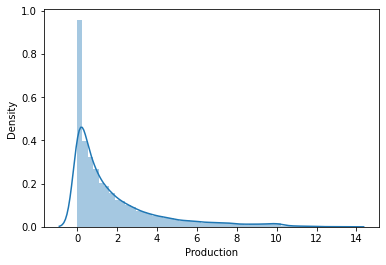

In [234]:
sns.distplot(y_train.Production)

In [235]:
#Random forest
pipe = make_pipeline(SimpleImputer(),st, RandomForestRegressor(n_estimators=100,criterion="mse",bootstrap=True))

In [236]:
import time 
%time
pipe.fit(x_train,y_train)


CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 19.8 µs


/usr/local/lib/python3.6/dist-packages/sklearn/pipeline.py:354: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params)


Pipeline(memory=None,
         steps=[('simpleimputer',
                 SimpleImputer(add_indicator=False, copy=True, fill_value=None,
                               missing_values=nan, strategy='mean',
                               verbose=0)),
                ('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('randomforestregressor',
                 RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                       criterion='mse', max_depth=None,
                                       max_features='auto', max_leaf_nodes=None,
                                       max_samples=None,
                                       min_impurity_decrease=0.0,
                                       min_impurity_split=None,
                                       min_samples_leaf=1, min_samples_split=2,
                                       min_weight_fraction_leaf=0.0,
                                       n

In [237]:
pipe.score(x_train,y_train),pipe.score(x_test,y_test)

(0.9773025084265206, 0.547396840485247)

In [239]:
#test_x=test_x.drop(["NWP4_00h_D-2_CLCT","NWP4_00h_D-2_U","NWP4_00h_D-2_V","NWP3_18h_D_U","NWP3_18h_D_V","NWP3_18h_D_T","NWP2_12h_D_U","NWP2_12h_D_V","NWP3_12h_D_T","NWP3_12h_D_U"],axis = 1)

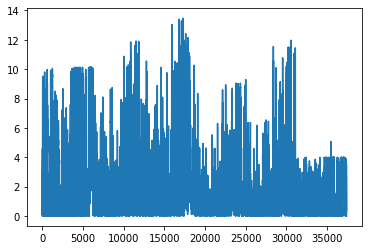

In [243]:

plt.plot(train_y.Production)
plt.show()

In [ ]:
# Hyperparameter tuning 
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [50,100]
# Number of features to consider at every split
max_features =["auto","sqrt"]
# Maximum number of levels in tree
max_depth = [7,10]
max_depth.append(None)
# Method of selecting samples for training each tree
bootstrap = [True,False]
# Create the random grid
random_grid = {'n_estimators':n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'bootstrap': bootstrap}

In [ ]:
# First create the base model to tune
rf = RandomForestRegressor(verbose=True)

rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid)
# Fit the random search model
rf_random.fit(x_train, y_train.Production)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:   11.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:   12.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:   12.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_j

RandomizedSearchCV(cv=None, error_score=nan,
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=100,
                           

In [ ]:
rf_random.best_params_

{'bootstrap': False,
 'max_depth': None,
 'max_features': 'sqrt',
 'n_estimators': 50}

In [ ]:
[mean_squared_error(y_test,rf_random.predict(x_test)),mean_squared_error(y_train,rf_random.predict(x_train),squared=False),rf_random.score(x_train,y_train),rf_random.score(x_test,y_test)]

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    0.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    0.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    0.1s finished


[1.4575456177952544, 2.074096748726379e-15, 1.0, 0.5724970888849548]

In [ ]:
# GradientBoostingRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV

param_grid={'n_estimators':[100], 
            'learning_rate': [0.1,0.01],
            'max_depth':[4], 
            'min_samples_leaf':[3], 
            'max_features':[1.0] } 
n_jobs=4
model = GradientBoostingRegressor(random_state=0,verbose=True)
cv_model = GridSearchCV(estimator=model, cv=5, param_grid=param_grid,  n_jobs=n_jobs) 
cv_model.fit(x_train, y_train)


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


      Iter       Train Loss   Remaining Time 
         1           4.8865            1.39m
         2           4.3940            1.38m
         3           3.9881            1.36m
         4           3.6282            1.34m
         5           3.3251            1.32m
         6           3.0552            1.31m
         7           2.8258            1.29m
         8           2.6273            1.28m
         9           2.4593            1.26m
        10           2.3093            1.25m
        20           1.5298            1.10m
        30           1.2871           57.42s
        40           1.1828           49.04s
        50           1.1263           40.83s
        60           1.0898           32.69s
        70           1.0677           24.58s
        80           1.0401           16.42s
        90           1.0156            8.23s
       100           0.9990            0.00s


GridSearchCV(cv=5, error_score=nan,
             estimator=GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0,
                                                 criterion='friedman_mse',
                                                 init=None, learning_rate=0.1,
                                                 loss='ls', max_depth=3,
                                                 max_features=None,
                                                 max_leaf_nodes=None,
                                                 min_impurity_decrease=0.0,
                                                 min_impurity_split=None,
                                                 min_samples_leaf=1,
                                                 min_samples_split=2,
                                                 min_weight_fraction_leaf=0.0,
                                                 n_estimators=100,
                                                 n_iter_n...one,
                        

In [ ]:
[mean_squared_error(y_test,cv_model.predict(x_test)),mean_squared_error(y_train,cv_model.predict(x_train)),cv_model.score(x_train,y_train),cv_model.score(x_test,y_test)]

[1.550558934931288, 0.9989917447257505, 0.8162662373426305, 0.5452159778427704]

In [282]:
df=pd.concat([train_x,train_y],axis=1)
train_wf1=df[df["WF"]=="WF1"]
train_wf2=df[df["WF"]=="WF2"]
train_wf3=df[df["WF"]=="WF3"]
train_wf4=df[df["WF"]=="WF4"]
train_wf5=df[df["WF"]=="WF5"]
train_wf6=df[df["WF"]=="WF6"]



In [283]:
y_train_wf1=train_wf1[["ID","Production"]]
x_train_wf1=train_wf1.drop(["ID","Production","WF","Time"],axis=1)
y_train_wf2=train_wf2[["ID","Production"]]
x_train_wf2=train_wf2.drop(["ID","Production","WF","Time"],axis=1)
y_train_wf3=train_wf3[["ID","Production"]]
x_train_wf3=train_wf3.drop(["ID","Production","WF","Time"],axis=1)
y_train_wf4=train_wf4[["ID","Production"]]
x_train_wf4=train_wf4.drop(["ID","Production","WF","Time"],axis=1)
y_train_wf5=train_wf5[["ID","Production"]]
x_train_wf5=train_wf5.drop(["ID","Production","WF","Time"],axis=1)
y_train_wf6=train_wf6[["ID","Production"]]
x_train_wf6=train_wf6.drop(["ID","Production","WF","Time"],axis=1)


In [284]:
x_train_wf1

,NWP1_00h_D-2_U,NWP1_00h_D-2_V,NWP1_00h_D-2_T,NWP1_06h_D-2_U,NWP1_06h_D-2_V,NWP1_06h_D-2_T,NWP1_12h_D-2_U,NWP1_12h_D-2_V,NWP1_12h_D-2_T,NWP1_18h_D-2_U,NWP1_18h_D-2_V,NWP1_18h_D-2_T,NWP1_00h_D-1_U,NWP1_00h_D-1_V,NWP1_00h_D-1_T,NWP1_06h_D-1_U,NWP1_06h_D-1_V,NWP1_06h_D-1_T,NWP1_12h_D-1_U,NWP1_12h_D-1_V,NWP1_12h_D-1_T,NWP1_18h_D-1_U,NWP1_18h_D-1_V,NWP1_18h_D-1_T,NWP1_00h_D_U,NWP1_00h_D_V,NWP1_00h_D_T,NWP1_06h_D_U,NWP1_06h_D_V,NWP1_06h_D_T,NWP1_12h_D_U,NWP1_12h_D_V,NWP1_12h_D_T,NWP1_18h_D_U,NWP1_18h_D_V,NWP1_18h_D_T,NWP2_00h_D-2_U,NWP2_00h_D-2_V,NWP2_12h_D-2_U,NWP2_12h_D-2_V,...,NWP3_12h_D-2_U,NWP3_12h_D-2_V,NWP3_12h_D-2_T,NWP3_18h_D-2_U,NWP3_18h_D-2_V,NWP3_18h_D-2_T,NWP3_00h_D-1_U,NWP3_00h_D-1_V,NWP3_00h_D-1_T,NWP3_06h_D-1_U,NWP3_06h_D-1_V,NWP3_06h_D-1_T,NWP3_12h_D-1_U,NWP3_12h_D-1_V,NWP3_12h_D-1_T,NWP3_18h_D-1_U,NWP3_18h_D-1_V,NWP3_18h_D-1_T,NWP3_00h_D_U,NWP3_00h_D_V,NWP3_00h_D_T,NWP3_06h_D_U,NWP3_06h_D_V,NWP3_06h_D_T,NWP3_12h_D_V,NWP4_12h_D-2_U,NWP4_12h_D-2_V,NWP4_12h_D-2_CLCT,NWP4_00h_D-1_U,NWP4_00h_D-1_V,NWP4_00h_D-1_CLCT,NWP4_12h_D-1_U,NWP4_12h_D-1_V,NWP4_12h_D-1_CLCT,NWP4_00h_D_U,NWP4_00h_D_V,NWP4_00h_D_CLCT,NWP4_12h_D_U,NWP4_12h_D_V,NWP4_12h_D_CLCT
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-2.2485,-3.2578,286.44,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.254603,-0.289687,82.543144,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-2.4345,-1.4461,286.26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.490908,-0.413370,99.990844,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.3659,-3.0605,285.75,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.825605,2.892087,286.000000,-1.888967,0.326177,287.000000,-5.819939,2.181897,287.000000,-5.816164,2.222937,287.000000,-3.796250,-0.853745,287.000000,-1.707402,-1.460474,286.000000,-1.148957,-2.274751,286.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.997093,-1.415138,98.367235,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.7065,-6.2174,284.78,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.689598,-0.961441,94.860604,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.8134,-5.4446,284.46,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.290994,-0.294963,95.905879,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6234,NaN,NaN,NaN,NaN,NaN,NaN,0.3473,-8.5346,280.01,-1.5473,-7.3751,279.83,-1.8275,-7.4787,279.64,-1.4071,-7.5982,279.89,-2.5989,-7.1385,280.03,-3.1709,-5.6166,280.60,-1.8757,-7.1469,280.52,-2.5780,-7.1942,280.53,-3.1851,-6.6765,280.46,-2.5467,-7.6859,280.14,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.183121,-2.572002,-0.000013,0.039735,-2.360195,-0.000015,-0.342881,-2.369884,-0.000016,-0.190785,-2.347865,-0.00002
6235,NaN,NaN,NaN,NaN,NaN,NaN,0.2612,-8.0914,279.52,-2.2067,-6.9415,279.32,-1.9280,-7.0114,279.19,-1.

In [285]:
x1_train_wf1=x_train_wf1[:4000]
x1_test_wf1=x_train_wf1[4000:]
y1_train_wf1=y_train_wf1[:4000]
y1_test_wf1=y_train_wf1[4000:]

In [287]:
y1_test_wf1

,ID,ID,Production
4000,4001,4001,10.09
4001,4002,4002,9.62
4002,4003,4003,9.20
4003,4004,4004,5.60
4004,4005,4005,6.55
...,...,...,...
6234,6235,6235,0.45
6235,6236,6236,0.54
6236,6237,6237,0.05
6237,6238,6238,0.04


In [291]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
imp = IterativeImputer(max_iter=10, random_state=0)
pipe = make_pipeline(imp,st, RandomForestRegressor(n_estimators=50,criterion="mse",verbose=True,bootstrap=True))
pipe.fit(x1_train_wf1,y1_train_wf1.Production)

/usr/local/lib/python3.6/dist-packages/sklearn/impute/_iterative.py:638: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  " reached.", ConvergenceWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:   24.5s finished


Pipeline(memory=None,
         steps=[('iterativeimputer',
                 IterativeImputer(add_indicator=False, estimator=None,
                                  imputation_order='ascending',
                                  initial_strategy='mean', max_iter=10,
                                  max_value=None, min_value=None,
                                  missing_values=nan, n_nearest_features=None,
                                  random_state=0, sample_posterior=False,
                                  skip_complete=False, tol=0.001, verbose=0)),
                ('standardscaler',
                 StandardScaler...
                 RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                       criterion='mse', max_depth=None,
                                       max_features='auto', max_leaf_nodes=None,
                                       max_samples=None,
                                       min_impurity_decrease=0.0,
                    

In [292]:
pipe.score(x1_train_wf1,y1_train_wf1.Production),pipe.score(x1_test_wf1,y1_test_wf1.Production)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    0.0s finished


(0.9831704456111982, 0.5448275350150227)

In [295]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
imp = IterativeImputer(max_iter=20, random_state=0)
pipe = make_pipeline(imp,st, RandomForestRegressor(n_estimators=100,criterion="mse",verbose=True,bootstrap=True))
pipe.fit(x_train,y_train.Production)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:  3.7min finished


Pipeline(memory=None,
         steps=[('iterativeimputer',
                 IterativeImputer(add_indicator=False, estimator=None,
                                  imputation_order='ascending',
                                  initial_strategy='mean', max_iter=20,
                                  max_value=None, min_value=None,
                                  missing_values=nan, n_nearest_features=None,
                                  random_state=0, sample_posterior=False,
                                  skip_complete=False, tol=0.001, verbose=0)),
                ('standardscaler',
                 StandardScaler...
                 RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                       criterion='mse', max_depth=None,
                                       max_features='auto', max_leaf_nodes=None,
                                       max_samples=None,
                                       min_impurity_decrease=0.0,
                    

In [296]:
pipe.score(x_train,y_train.Production),pipe.score(x_test,y_test.Production)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    0.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    0.2s finished


(0.9740001858554764, 0.5223992876886575)

In [297]:
!pip install nb_black

     |████████████████████████████████| 1.1MB 3.7MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 747kB 44.4MB/s 
     |████████████████████████████████| 727kB 51.3MB/s 
  Created wheel for black: filename=black-20.8b1-cp36-none-any.whl size=124184 sha256=dc99f72f7a26f2f13b5dc5549ef1de42cdcceb20968ad55ab2f4d32d4384289d
  Stored in directory: /root/.cache/pip/wheels/6e/10/b5/edf7359c2edd0305cce7e3f96e07daf7ce55dceac9d3ce3373
Successfully built black
  Created wheel for nb-black: filename=nb_black-1.0.7-cp36-none-any.whl size=5282 sha256=633e5ac046260f33d043aaad3c82e7e203ce2a0af97408308101064f39a040ef
  Stored in directory: /root/.cache/pip/wheels/35/6d/99/856a3401e3a2153f51223f1be990e4b30f80f9e4bd1604ae9b
Successfully built nb-black
  Found existing installation: regex 2019.12.20
    Uninstalling regex-2019.12.20:
      Successfully uninstalled regex-2019.12.20
